In [2]:
import pandas as pd
# importing libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [3]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [6]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [8]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [13]:
titanic_df.shape #(891, 14)
#already dropped the cabin column which had a very large number of missing values, therefore dropna will not drop as many rows now
titanic_df = titanic_df.dropna()
titanic_df.shape #(714, 14)

(714, 14)

In [14]:
#Pclass, Age, Sex female, Sex male, Embarked C, Q, S
X = titanic_df.iloc[:,[2, 4, 9, 10, 11, 12, 13]].values
#Survived
y = titanic_df.iloc[:,1].values

#split into train and test
r = 4
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.2, random_state=r)

#split training set into train / develop sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
#Decision tree on the development set
# training a model without pruning
unpruned_dev = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned_dev.fit(X_dev, y_dev)
print("Performance without pruning:", unpruned_dev.score(X_dev, y_dev))
print("At depth:", unpruned_dev.tree_.max_depth)

Performance without pruning: 0.9739130434782609
At depth: 10


very high accuracy of 97.4% on the unpruned dev data tree
May be indicative of overfitting if the error margin is too small, as the predictions may fit too literally and be unable to generalise to the unseen data

In [16]:
#Decision tree on the training set
# training a model without pruning
unpruned_train = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned_train.fit(X_train, y_train)
print("Performance without pruning:", unpruned_train.score(X_train, y_train))
print("At depth:", unpruned_train.tree_.max_depth)

Performance without pruning: 0.9298245614035088
At depth: 18


Exposing the larger set of data (the 80% of the original training set split) to the same un-pruned model has a slightly lower accuracy of 93.0%, so the dev model may not have been general enough and may have and over-fit to the development set too closely, such that it was less appropriate and less general for fitting the unseen data in the training set resulting in a lower accuracy. However, a slightly lower accuracy is expected on a larger data set, especially considering the training set tree reached a max depth of 18 meanwhile the dev set only got to 10 without pruning, meaning the training set was able to identify more patterns than the dev set did because it contained more data to work with. This makes it more prone to error as data records are more likely to end up in a category that is too specific or slightly incorrect.

This suggests that pruning the dev tree to make it more general can be beneficial to prevent overfitting.

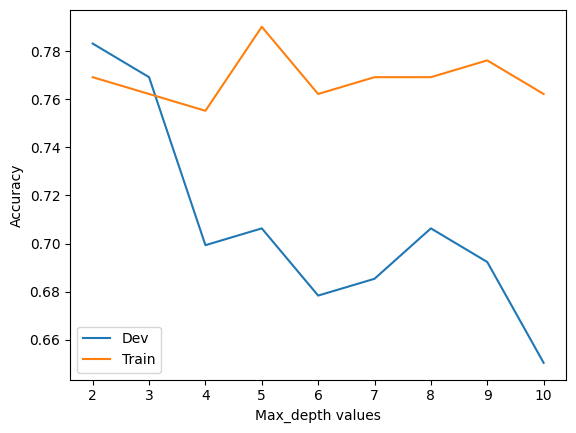

In [21]:
#pruning the dev set tree
# looking at effect of pruning the dev tree against the train data
#pruned_depths = range(1,unpruned_dev.tree_.max_depth+1)
pruned_depths = range(2, 11)

pruned_scores_dev = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_dev, y_dev)
  #score = clf.score(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores_dev.append(score)

pruned_scores_train = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores_train.append(score)

fig, ax = plt.subplots()
devline = ax.plot(pruned_depths, pruned_scores_dev, label='Dev')
trainline = ax.plot(pruned_depths, pruned_scores_train, label='Train')
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
ax.legend() #makes the labels in the label params above show up on the graph
plt.show()

In [22]:
# fitting the chosen tree
best_depth_dev = pruned_depths[np.argmax(pruned_scores_dev)]
print('Best DEV performance reached at depth of:', best_depth_dev)

best_depth_train = pruned_depths[np.argmax(pruned_scores_train)]
print('Best TRAIN performance reached at depth of:', best_depth_train)

#pruned = DecisionTreeClassifier(max_depth=best_depth)
#pruned.fit(X, y)

Best DEV performance reached at depth of: 2
Best TRAIN performance reached at depth of: 5


the dev set has the highest accuracy at depth 2, and then drops drastically beyond a depth of 3. This means the model predicts the training data more accurately at a shallower depth of 2, which implies that it is general enough to classify the rest of the data fairly correctly, however it might be too general such that the data is not classified specifically enough, therefore variations in each class are not really captured. This may have occurred because the dev set is such a small fraction of the dataset that it was unable to discover consistent patterns with more specific trees.

This does not represent what I see with the training set, as the accuracy remains relatively high for all depths of 2-10 but peaks at a depth of 5. As a result, I suspect my model is suitable for a depth of 4-5 to have a bit more specificity in my classification and not get a high accuracy just because the classification rules are too vague.


In [25]:
#Decision tree on the test data
# training a model without pruning
unpruned_test = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned_test.fit(X_test, y_test)
print("Performance without pruning:", unpruned_test.score(X_test, y_test))
print("At depth:", unpruned_test.tree_.max_depth)

Performance without pruning: 0.951048951048951
At depth: 9


In [26]:
pruned = DecisionTreeClassifier(max_depth=best_depth_train)
pruned.fit(X, y)
print("Performance after pruning:", pruned.score(X, y))
print("At depth:", pruned.tree_.max_depth)

Performance after pruning: 0.8263305322128851
At depth: 5


In the end, my model has an accuracy of 82.6% on the full test data, which is relatively high and gives me confidence that the model is well fitted, but leaves enough error that I don't suspect the model here is over-fitted.